In [79]:
#Import Library
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [61]:
#Read data CSV
train_df = pd.read_csv("cs-training.csv")
test_df  = pd.read_csv("cs-test.csv")
submission = pd.read_csv('sampleEntry.csv')

# Exploratory Data Analysis

In [4]:
#Menampilkan Data 5 di dari atas
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [62]:
#Menghapus Kolom yang tidak berguna
train_df  = train_df.drop(['Unnamed: 0'], axis=1)
test_df  = test_df.drop(['Unnamed: 0'], axis=1)

#Menampilkan Atribut
print(train_df.columns)
print(test_df.columns)

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


Dari Data yang di lihat terdapat kolom yang hanya berisikan index data pertama hingga terakhir dan tidak akan berguna untuk prediksi dan juga akurasi, Jadi lebih baik Di hilangkan.

In [7]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Dari tampilan data ini dapat di lihat bahwa terdapat data yang agak aneh dan adanya outlier salah satunya pada kolom "age" terdapat nilai minimum 0 yang tidak mungkin umur 0 tahun dapat memiliki kartu kredit.

In [8]:
# Cek Missing Value pada training table
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [9]:
# Cek Missing Value (null) pada testing table
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

Dapat Dilihat bahwa Terdapat missing value pada kolom "MonthlyIncome" dan "NumberOfDependents", Hal tersebut terjadi pada kedua data Training dan Testing.

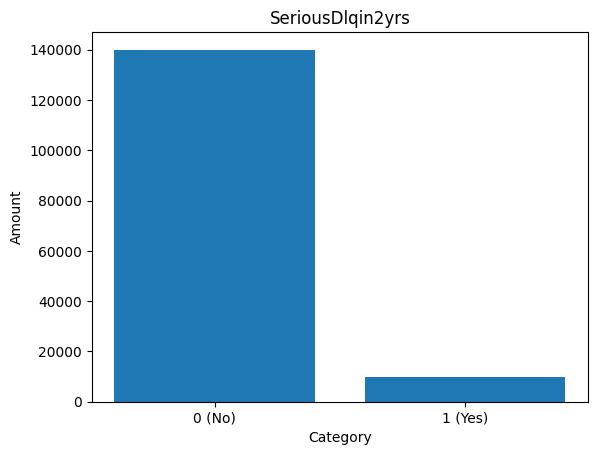

In [10]:
#Melihat Persebaran data Target
value_counts = train_df['SeriousDlqin2yrs'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0 (No)', '1 (Yes)'])
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('SeriousDlqin2yrs')
plt.show()

Terdapat data yang tidak Balance dan berat sebelah, Seharusnya jumlah Data tersebut setidakanya balance contohnya dari rasio 10 maka data tersebut setidaaknya 5:5 atau 6:4. Cara mengatasinya Dapt melakukan Oversampling dengan SMOTE.

<Axes: >

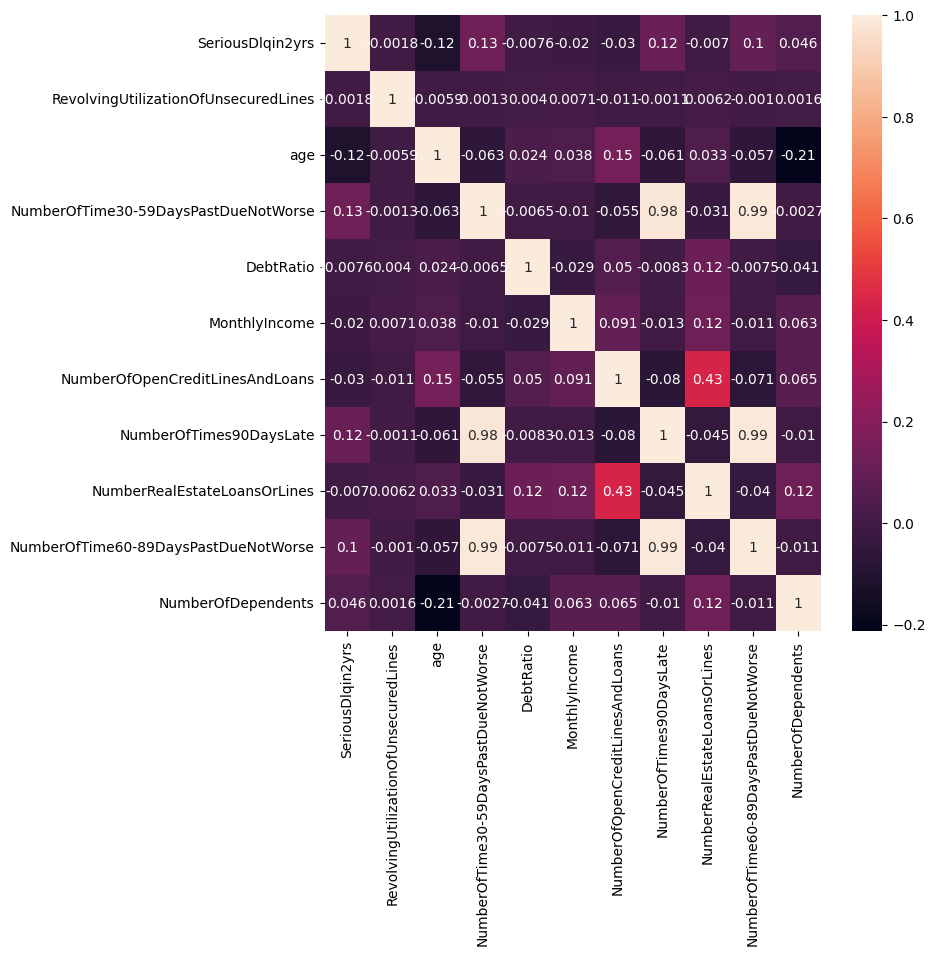

In [16]:
#Melihat korelasi data
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_df.corr(), annot=True)

Dari Visualisasi di atas dapat di lihat bahwa 3 fitur yaitu "NumberOfTme30-59DaysPastDueNotWorse", "NumberOfTimes90DyasLate" dan "NumberOfTime60-89DaysPastDueNotWorse" Memiliki Korelasi yang tinggi "0.99" Kemudian pada "age" dan "NumberOfDependents" Memiliki Korelasi yang paling rendah "-.21"

Text(0, 0.5, 'Total')

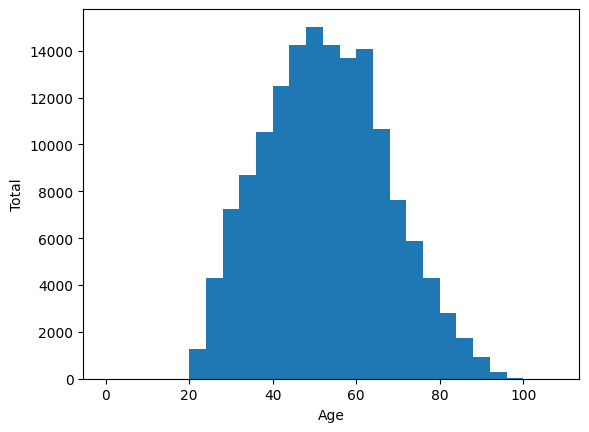

In [17]:
#Melihat persebaran data Age
age_bins = [e for e in range(0, 110, 4)]

plt.hist(train_df["age"], bins=age_bins)

plt.xlabel('Age')
plt.ylabel('Total')

Dapat Di lihat bahwa Persebaran Age Kebanyakan orang mengajukan Kartu Kredit di rentan 45 - 65 Tahun.

# Feature Engineering

In [63]:
#Cek Duplikat Data
print('Train Duplicated: ',train_df.duplicated().sum())
print('Train size: ', train_df.shape)

Train Duplicated:  609
Train size:  (150000, 11)


Dapat dilihat pada Dataset Train memiliki 609 data duplikat, yang di mana tidak akan berguna untuk

In [64]:
#drop duplicate dataset
train_df = train_df.drop_duplicates()
print('Train dataset after dropping Duplicate: ',train_df.shape)

Train dataset after dropping Duplicate:  (149391, 11)


<Axes: ylabel='age'>

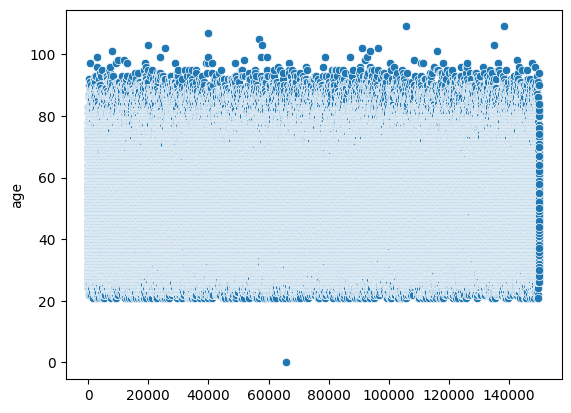

In [20]:
sns.scatterplot(train_df.age)

Dari penjelasan sebelumnya pada kolom "age" terdapat Minimum umur yang tidak masuk akal untuk mengajukan kredit, Dapat di lihat pada visualisasi di atas terdapat 1 titik yang berada di 0. Lebih baik data tersebut di hapus karena tidak masuk akal jika orang yang berusia 0 Tahun dapat mengajukan Pinjaman.

<Axes: ylabel='age'>

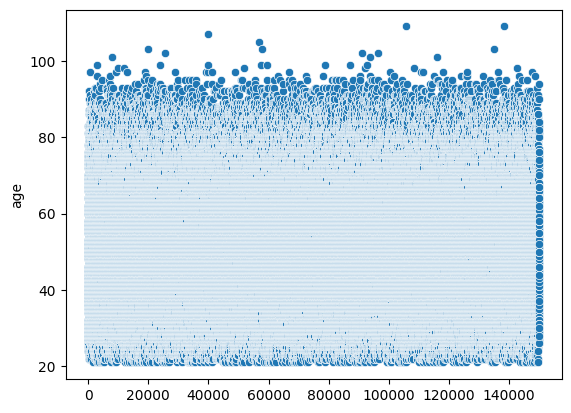

In [65]:
train_df.drop(train_df[train_df.age == 0].index, inplace = True)
sns.scatterplot(train_df.age)

In [23]:
train_df["age"].describe()

count    149390.000000
mean         52.306587
std          14.725390
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Dapat di lihat Batas minimal Umur setelah nominal 0 di hilangkan yaitu 21 tahun yang masuk akal. Tetapi Pada jumlah max terapat 109 Tahun yang terlampau jauh dari 75%.

In [66]:
def remove_outliers(df, attribute_name, max_scale_from_std):
    # Hitung deviasi standar
    std = df[attribute_name].std()

    # Hitung batas atas dan batas bawah berdasarkan deviasi standar
    upper_bound = df[attribute_name].mean() + max_scale_from_std * std
    lower_bound = df[attribute_name].mean() - max_scale_from_std * std

    # Hapus outlier dengan mengganti nilainya dengan mean
    df.loc[df[attribute_name] > upper_bound, attribute_name] = df[attribute_name].mean()
    df.loc[df[attribute_name] < lower_bound, attribute_name] = df[attribute_name].mean()

    return df

Fungsi di atas berguna untuk mengganti outlier dengan Menghitung Standard Deviasinya kemudian menghitung Batas atas dan Batas bawah berdasarkan Standard deviasi. kemudian mengganti outlier berdasarkan rata rata jika value tersebut berada di atas batas atas atau batas bawah, maka data tersebut di ganti. Banyak cara untuk menghapus outlier tetapi cara ini adalah cara yang paling mudah untuk di gunakan.

<Axes: ylabel='NumberOfTimes90DaysLate'>

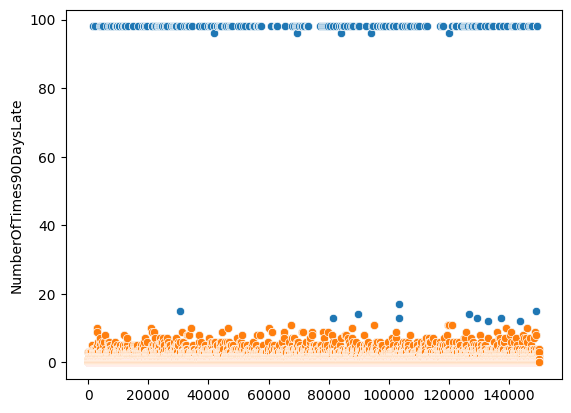

In [67]:
# NumberOfTimes90DaysLate
sns.scatterplot(train_df.NumberOfTimes90DaysLate)
train_df = remove_outliers(train_df, "NumberOfTimes90DaysLate", 3)
sns.scatterplot(train_df.NumberOfTimes90DaysLate)

<Axes: ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

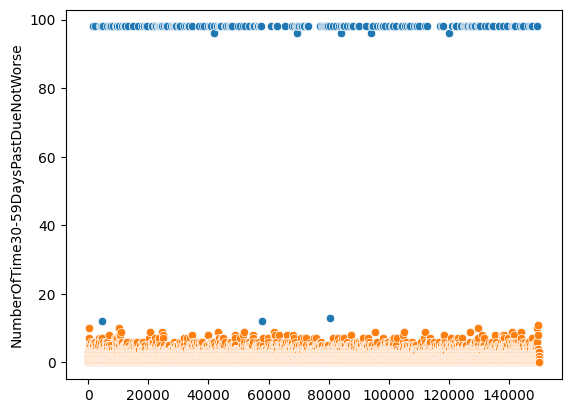

In [68]:
#NumberOfTime30-59DaysPastDueNotWorse
sns.scatterplot(train_df["NumberOfTime30-59DaysPastDueNotWorse"])
train_df = remove_outliers(train_df, "NumberOfTime30-59DaysPastDueNotWorse", 3)
sns.scatterplot(train_df["NumberOfTime30-59DaysPastDueNotWorse"])

<Axes: ylabel='NumberOfTime60-89DaysPastDueNotWorse'>

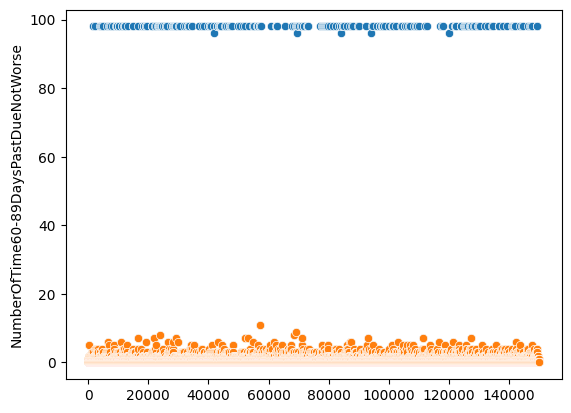

In [69]:
#NumberOfTime60-89DaysPastDueNotWorse
sns.scatterplot(train_df["NumberOfTime60-89DaysPastDueNotWorse"])
train_df = remove_outliers(train_df, "NumberOfTime60-89DaysPastDueNotWorse", 3)
sns.scatterplot(train_df["NumberOfTime60-89DaysPastDueNotWorse"])

Dapat Di lihat Dots Yang berwarna biru adalah data sebelum outlier Removal, Dan Dots yang berwarna Orange adalah data setelah outlier removal, Penghapusan data outlier ini berdasarkan pertimbangan karena korelasi yang sangat tinggi dan juga data yang bukan outlier jauh lebih banyak di bandingkan data outlier.

Ada Banyak cara untuk mengisi Missing Value seperti, Menghapus, mengganti dengan 0, dan lainnya tetapi saya menggunakan mean, median dan mode karena hal tersebut paling mudah untuk di pahami.

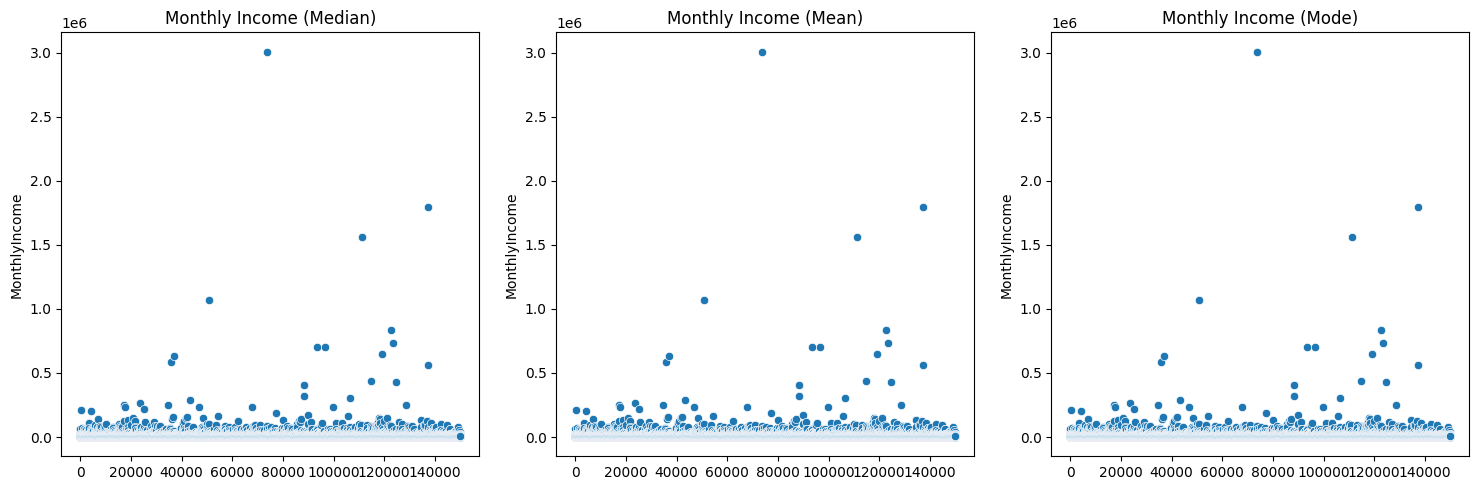

In [31]:
#Membandingkan Data setelah missing value di masukan dengan Mean, Median Dan Mode
monthly_income_check = train_df['MonthlyIncome']
monthly_income_median = monthly_income_check.fillna(monthly_income_check.median())
monthly_income_mean = monthly_income_check.fillna(monthly_income_check.mean())
monthly_income_mode = monthly_income_check.fillna(monthly_income_check.mode())

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(data=monthly_income_median)
plt.title('Monthly Income (Median)')

plt.subplot(132)
sns.scatterplot(data=monthly_income_mean)
plt.title('Monthly Income (Mean)')

plt.subplot(133)
sns.scatterplot(data=monthly_income_mode)
plt.title('Monthly Income (Mode)')

plt.tight_layout()

In [70]:
train_df.MonthlyIncome.fillna(train_df.MonthlyIncome.mean(), inplace= True)
test_df.MonthlyIncome.fillna(test_df.MonthlyIncome.mean(), inplace= True)

Berdasarkan data di atas, persebaran datanya mirip dan saya mengambil mean sebagai pengganti value yang hilang karena Rata-rata adalah cara yang paling masuk akal saat mengisi missing value Gaji karena gaji bulanan itu berdasarkan range bukan kategori.

In [43]:
train_df["MonthlyIncome"].info()

<class 'pandas.core.series.Series'>
Int64Index: 149390 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype  
--------------   -----  
149390 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


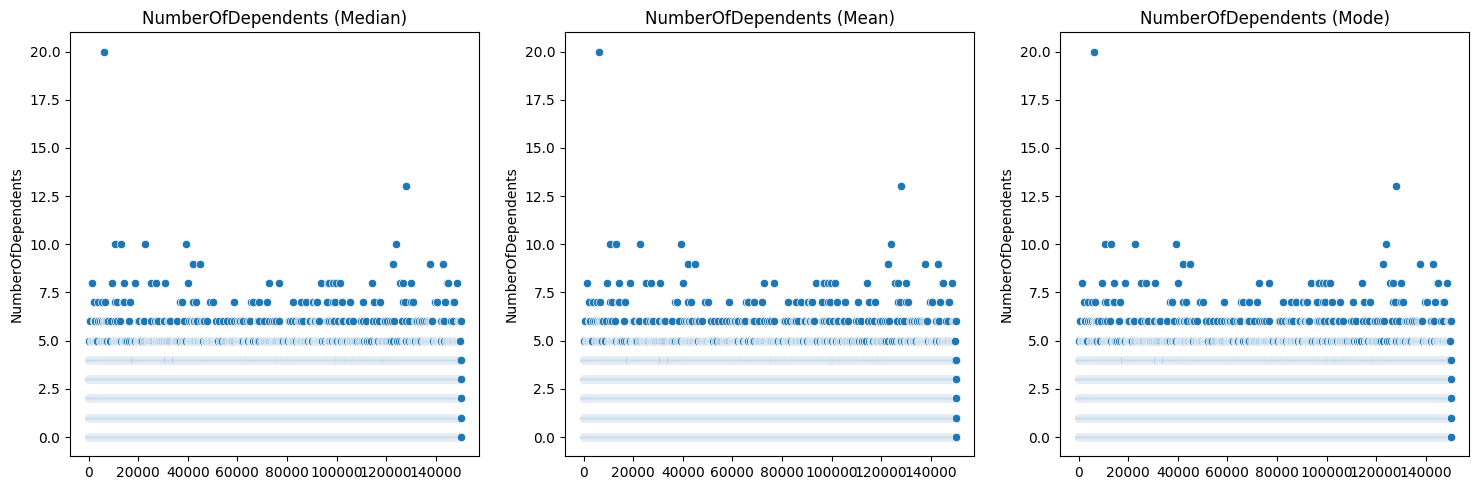

In [47]:
#Membandingkan Data setelah missing value di masukan dengan Mean, Median Dan Mode
NumberOfDependents_check = train_df['NumberOfDependents']
NumberOfDependents_median = NumberOfDependents_check.fillna(NumberOfDependents_check.median())
NumberOfDependents_mean = NumberOfDependents_check.fillna(NumberOfDependents_check.mean())
NumberOfDependents_mode = NumberOfDependents_check.fillna(NumberOfDependents_check.mode())

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(data=NumberOfDependents_median)
plt.title('NumberOfDependents (Median)')

plt.subplot(132)
sns.scatterplot(data=NumberOfDependents_mean)
plt.title('NumberOfDependents (Mean)')

plt.subplot(133)
sns.scatterplot(data=NumberOfDependents_mode)
plt.title('NumberOfDependents (Mode)')

plt.tight_layout()

In [71]:
train_df.NumberOfDependents = train_df.NumberOfDependents.fillna(train_df.NumberOfDependents.mode()[0])
test_df.NumberOfDependents = test_df.NumberOfDependents.fillna(test_df.NumberOfDependents.mode()[0])

Untuk data NumberOfDependents Saya menggunakan Mode karena data NumberOfDependents adalah data yang kategorikal dan diskrit.

In [55]:
train_df["MonthlyIncome"].info()

<class 'pandas.core.series.Series'>
Int64Index: 149390 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype  
--------------   -----  
149390 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [56]:
train_df["NumberOfDependents"].describe()

count    149390.000000
mean          0.740384
std           1.108271
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [57]:
test_df["NumberOfDependents"].describe()

count    101503.00000
mean          0.74915
std           1.12860
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          43.00000
Name: NumberOfDependents, dtype: float64

Pada Data NumberOfDependents terdapat perbedaan yang cukup jauh pada 75% dan max, Dan data tersebut sedikit tidak masuk akan yang di mana Jumlah tanggungan dalam keluarga tidak termasuk dirinya sendiri (pasangan, anak, dll.), Data tersebut tidak wajar bagaimana seseorang memiliki hingga 20/43 tanggungan. Untuk sekarang biarkan saja dan kita akan melihatnya pada hasil model.

<Axes: ylabel='DebtRatio'>

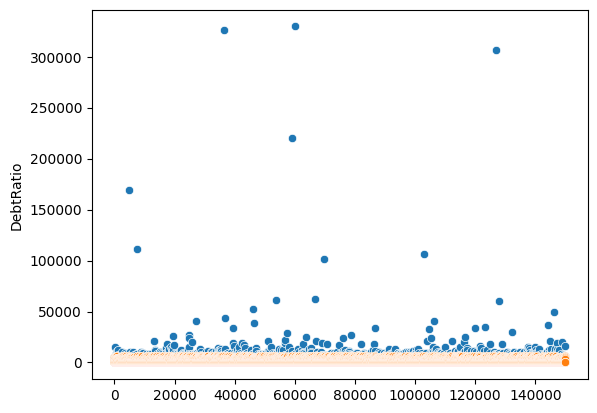

In [72]:
#Menghiangkan outlier pada DebtRatio
sns.scatterplot(train_df["DebtRatio"])
train_df = remove_outliers(train_df, "DebtRatio", 3)
sns.scatterplot(train_df["DebtRatio"])

In [60]:
train_df['DebtRatio'].describe()

count    149390.000000
mean        179.725636
std         520.954488
min           0.000000
25%           0.177441
50%           0.368233
75%           0.875294
max        2924.000000
Name: DebtRatio, dtype: float64

Pada data di atas terdapat data yang sangat Tidak jelas karena Bagaimana seseorang dapat membayar tanggungan melebihi batas pendapatannya seharusnya jika seseorang memiliiki banyak hutang nominalnya menjadi 1, Jika orang tersebut mempunyai tangungannya melebihi 1 berarti seseorang tersebut tidak akan bisa membayar hutang tersebut. setelah outlier di hilangkan, data tersebut masih saja tidak normal, untuk sekarang biar kan dulu data tersebut.

In [73]:
#Pembagian Partisi Data
x = train_df.drop("SeriousDlqin2yrs", axis=1)
y = train_df["SeriousDlqin2yrs"]

 fitur "SeriousDlqin2yrs" tidak di gunakan karena hanya digunakan untuk testing.

<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

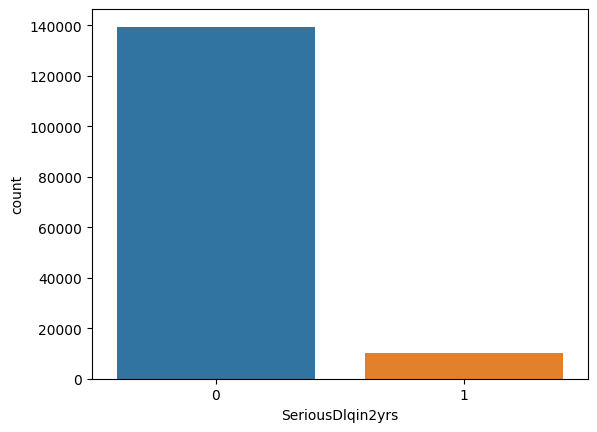

In [75]:
#Visualisasi Persebaran data "SeriusDlqin2yrs"
train_df.SeriousDlqin2yrs.value_counts()
sns.countplot(x='SeriousDlqin2yrs', data=train_df)

Dapat di lihat persebaran data tersebut tidak Balance Seperti Penjelasan di awal. kita akan Mencoba mengatasi hal tersebut dengan metode SMOTE.

<Axes: xlabel='target', ylabel='count'>

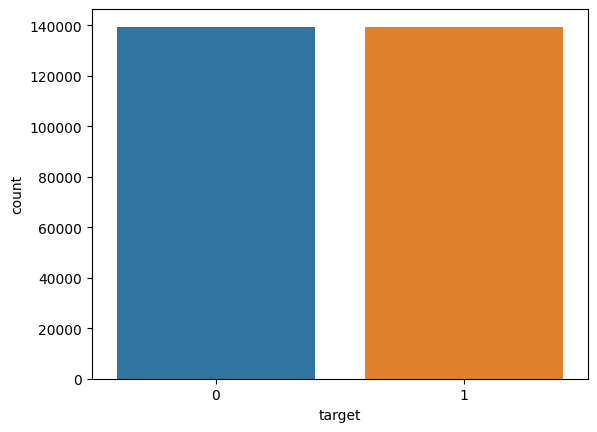

In [76]:
#SMOTE
oversample = SMOTE(sampling_strategy='auto', random_state=42)
x_sm, y_sm = oversample.fit_resample(x, y)

data = x_sm.copy()
data['target'] = y_sm

sns.countplot(x='target', data=data)

# Modeling

Setelah Melakukan Oversampling dengan SMOTE, Hasil dapa dilihat sudah balance.

In [77]:
#Pembagian Data
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state= 42)

Membagikan Data training dan testing dengan rasio 75/25, dan random State 42.

In [78]:
def plot_roc(y_test, prob):
    from sklearn.metrics import auc,roc_curve
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc = auc(fpr,tpr)
    plt.figure(1)
    plt.plot([0,1],[0,1], linestyle='--')
    plt.plot(fpr,tpr,'r',label= 'AUC= {:.4f}'.format(auc))
    plt.legend(loc='lower right')
    plt.plot(fpr,tpr, marker='.')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC Score: ', auc)

Pembuatan Fungsi untuk Melakukan pemodelan dan menampilkan Hasil Summary.

RandomForestClassifier


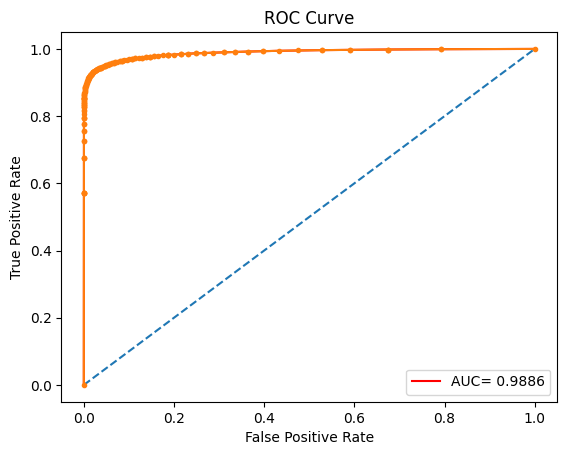

AUC Score:  0.9886242645311205
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27867
           1       0.97      0.94      0.95     27886

    accuracy                           0.96     55753
   macro avg       0.96      0.96      0.96     55753
weighted avg       0.96      0.96      0.96     55753

LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


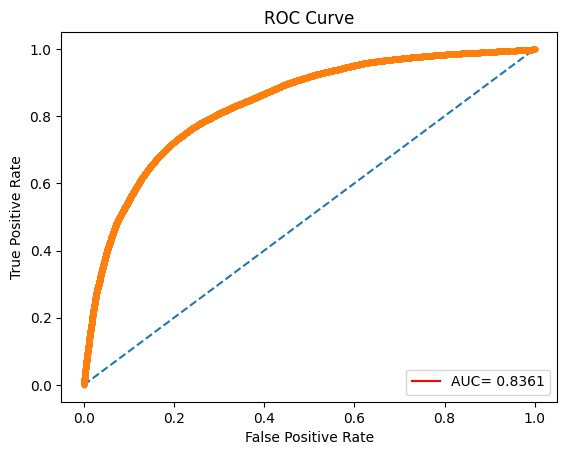

AUC Score:  0.8361386554937502
              precision    recall  f1-score   support

           0       0.73      0.83      0.77     27867
           1       0.80      0.69      0.74     27886

    accuracy                           0.76     55753
   macro avg       0.76      0.76      0.76     55753
weighted avg       0.76      0.76      0.76     55753

XGBClassifier


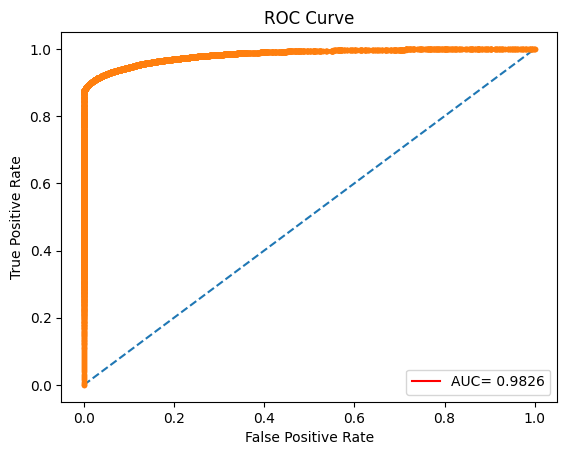

AUC Score:  0.9825554856279718
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     27867
           1       0.98      0.90      0.94     27886

    accuracy                           0.94     55753
   macro avg       0.94      0.94      0.94     55753
weighted avg       0.94      0.94      0.94     55753



In [80]:
model = [
    RandomForestClassifier(random_state= 42),
    LogisticRegression(random_state=42),
    XGBClassifier(random_state=42)
]
for final in model:
    model_name = final.__class__.__name__
    print(model_name)
    final.fit(x_train,y_train)
    predict = final.predict(x_test)
    predict_proba = final.predict_proba(x_test)[:,1]
    plot_roc(y_test, predict_proba)
    print(classification_report(y_test, predict))

In [81]:
rfc = RandomForestClassifier(random_state= 42)
rfc.fit(x_train, y_train)
test_df_x = test_df.drop('SeriousDlqin2yrs', axis =1)
predict_target = rfc.predict_proba(test_df_x)[:,1]

# Submission

In [82]:
submission['Probability'] = predict_target
print(submission.head())
submission.to_csv('submission.csv', index=False)
final = pd.read_csv('submission.csv')
print(final.head())

   Id  Probability
0   1         0.09
1   2         0.07
2   3         0.01
3   4         0.04
4   5         0.23
   Id  Probability
0   1         0.09
1   2         0.07
2   3         0.01
3   4         0.04
4   5         0.23


# Catatan

Masih Banyak kekurangan dari Model ini dan masih banyak yang saya belum mengerti, tetapi banyak hal yang dapat saya ambil dari pengerjaan salah satunya ilmu dalam preprocessing yang sangat sulit, dan saya belum pernah melakukan data preprocessing seadvance ini, Hal ini membuat saya menjadi ingin lebih banyak melakukan penyelesaian soal untuk mengasah diri saya.

Refrensi
*   https://www.kaggle.com/code/sridharstreaks/givemesomecredit-loan-default-challenege-0-86594
*  https://www.kaggle.com/code/mifuniree/beginner-give-me-some-credit#DATA-TRAINING
*   https://www.kaggle.com/code/briliyansanjaya/givemesomecredit-briliyan-sanjaya-hartono
*   https://www.kaggle.com/code/sarboldipo/givemesomecredit-eda-logistic-regression-woe


